In [7]:
import pandas as pd

file_path = "/Users/anirudhravipudi/Desktop/AI/Projects/ToyotaCorolla.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

categorical_vars = df.select_dtypes(include='object').columns.tolist()
print("Categorical Variables:", categorical_vars)

print(df[categorical_vars].nunique())

Categorical Variables: ['Model', 'Fuel_Type', 'Color']
Model        319
Fuel_Type      3
Color         10
dtype: int64


In [9]:
df_cleaned = df.drop(columns=['Model'])

df_encoded = pd.get_dummies(df_cleaned, columns=['Fuel_Type', 'Color'], drop_first=True)

df_encoded.head()

,Id,Price,Age (month),Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,1,13500,23,10,2002,46986,90,1,0,2000,...,False,False,True,False,False,False,False,False,False,False
1,2,13750,23,10,2002,72937,90,1,0,2000,...,False,False,False,False,False,False,True,False,False,False
2,3,13950,24,9,2002,41711,90,1,0,2000,...,False,False,True,False,False,False,False,False,False,False
3,4,14950,26,7,2002,48000,90,0,0,2000,...,False,True,False,False,False,False,False,False,False,False
4,5,13750,30,3,2002,38500,90,0,0,2000,...,False,True,False,False,False,False,False,False,False,False


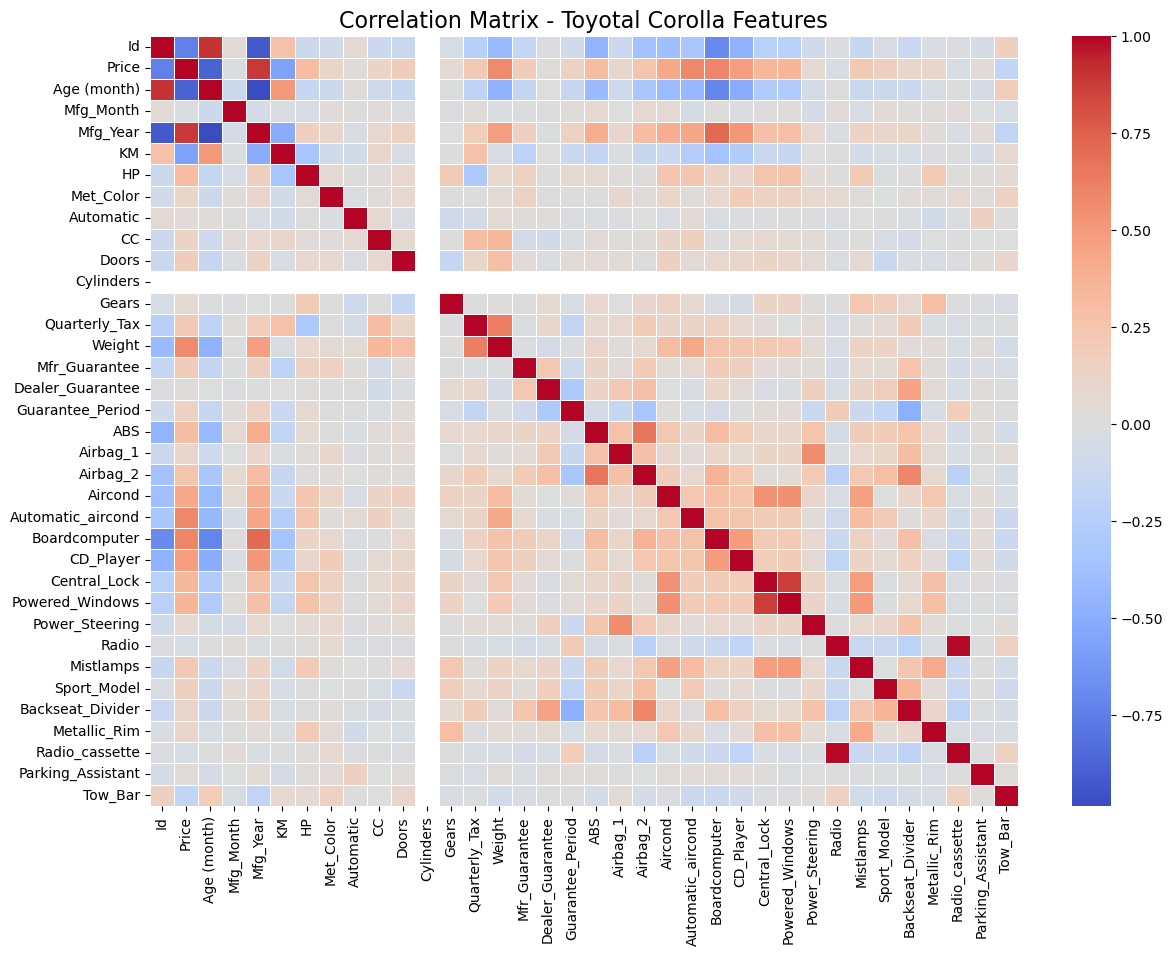

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df_encoded.select_dtypes(include=['int64', 'float64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix - Toyotal Corolla Features", fontsize=16)
plt.show()

In [12]:
plt.savefig("toyotal_corr_matrix.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df_numeric.drop(columns=['Id', 'Price'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [17]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

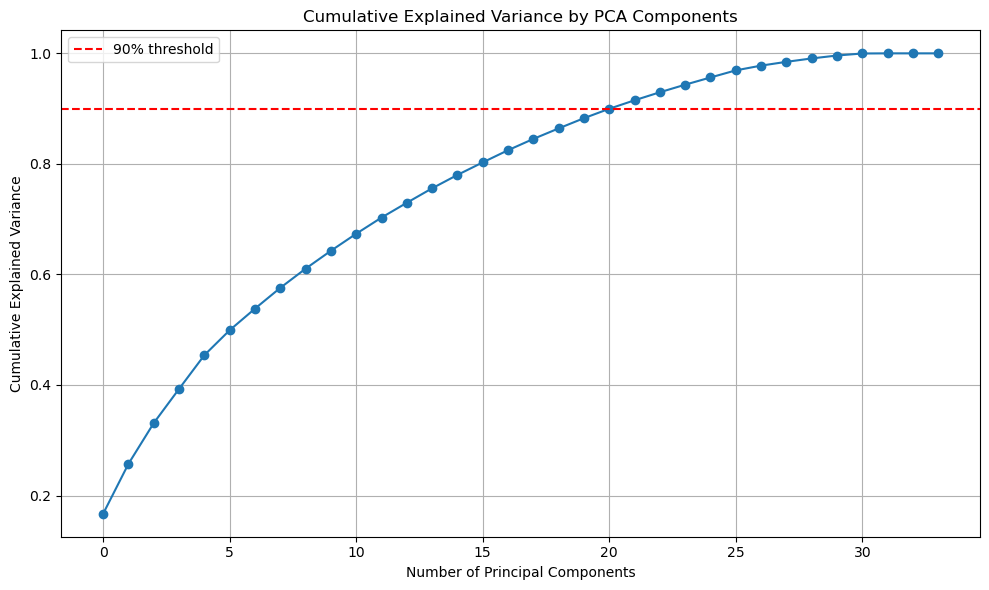

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

X_pca_reduced = X_pca[:, :19]

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca_reduced)

df_clustered = df_numeric.copy()
df_clustered['Cluster'] = clusters

In [23]:
cluster_summary = df_clustered.groupby('Cluster').mean()

cluster_counts = df_clustered['Cluster'].value_counts()

print("Cluster Sizes:\n", cluster_counts)
print("\nCluster Summary Statistics:\n", cluster_summary)

Cluster Sizes:
 Cluster
0    603
1    512
2    321
Name: count, dtype: int64

Cluster Summary Statistics:
                  Id         Price  Age (month)  Mfg_Month     Mfg_Year  \
Cluster                                                                  
0        862.733002   9069.582090    63.139303   5.422886  1999.036484   
1        873.312500   9650.349609    63.548828   5.591797  1998.988281   
2        214.295950  15574.850467    30.311526   5.716511  2001.747664   

                   KM          HP  Met_Color  Automatic           CC  ...  \
Cluster                                                               ...   
0        75597.079602   96.895522   0.583748   0.059701  1540.348259  ...   
1        77035.130859  104.062500   0.695312   0.052734  1570.611328  ...   
2        41703.224299  106.071651   0.813084   0.052960  1655.395639  ...   

         Powered_Windows  Power_Steering     Radio  Mistlamps  Sport_Model  \
Cluster                                                   

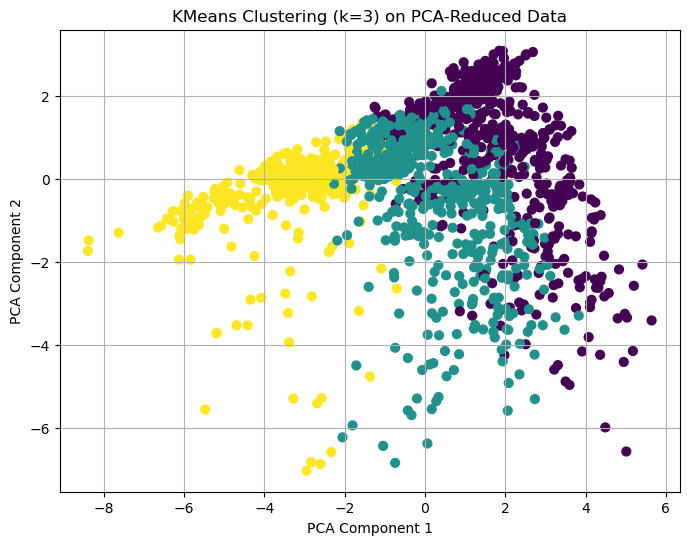

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=clusters, cmap='viridis', s=40)
plt.title("KMeans Clustering (k=3) on PCA-Reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [27]:
import numpy as np

points = {
    'a': np.array([0, 0]),
    'b': np.array([8, 0]),
    'c': np.array([16, 0]),
    'd': np.array([0, 6]),
    'e': np.array([8, 6]),
    'f': np.array([16, 6])
}

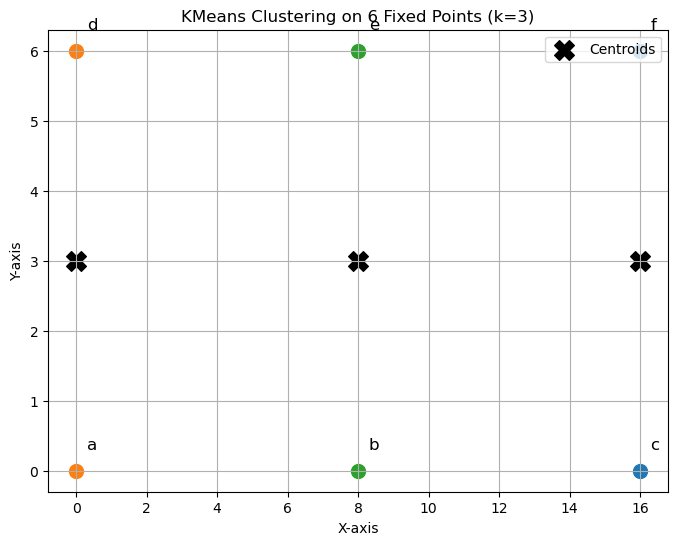

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

points = np.array([
    [0, 0], 
    [8, 0], 
    [16, 0], 
    [0, 6], 
    [8, 6], 
    [16, 6]
])

labels = ['a', 'b', 'c', 'd', 'e', 'f']

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(points)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))

for i, label in enumerate(labels):
    plt.scatter(points[i, 0], points[i, 1], c=f'C{clusters[i]}', s=100)
    plt.text(points[i, 0]+0.3, points[i, 1]+0.3, label, fontsize=12)


plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.title("KMeans Clustering on 6 Fixed Points (k=3)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.legend()
plt.show()

✅ Number of unique stable 3-partitions: 7
Examples of stable cluster assignments (by point indices):
Partition 1: [(0, 3), (1, 4), (2, 5)]
Partition 2: [(0,), (1, 2, 4, 5), (3,)]
Partition 3: [(0, 3), (1, 2), (4, 5)]


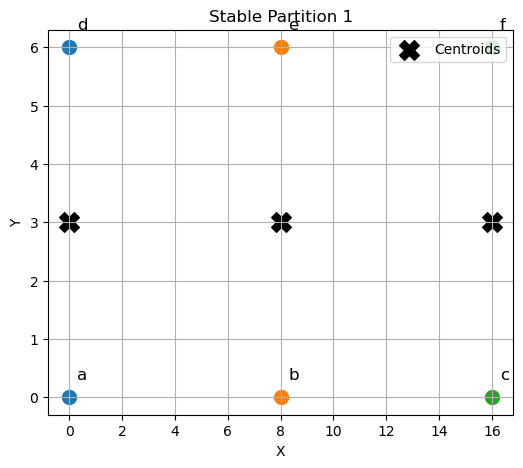

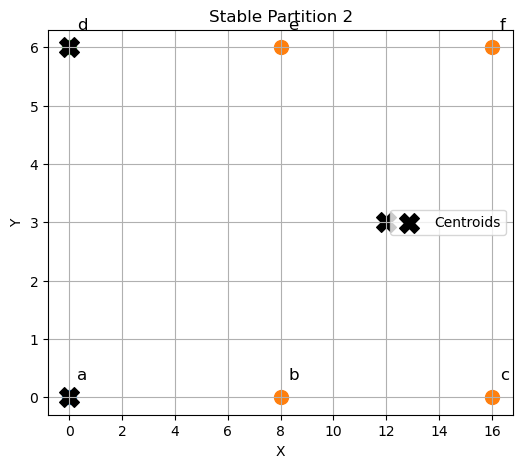

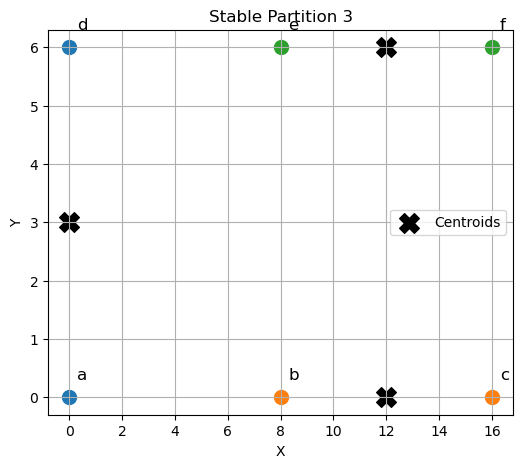

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from itertools import combinations

points = np.array([
    [0, 0],    # a
    [8, 0],    # b
    [16, 0],   # c
    [0, 6],    # d
    [8, 6],    # e
    [16, 6]    # f
])

labels = ['a', 'b', 'c', 'd', 'e', 'f']

index_combinations = list(combinations(range(6), 3))

unique_partitions = []
partition_plots = []

for idx_combo in index_combinations:
    init_centroids = points[list(idx_combo)]

    kmeans = KMeans(n_clusters=3, init=init_centroids, n_init=1, max_iter=100, random_state=42)
    labels_pred = kmeans.fit_predict(points)

    sorted_labels = sorted([tuple(sorted(np.where(labels_pred == i)[0])) for i in range(3)])

    if sorted_labels not in unique_partitions:
        unique_partitions.append(sorted_labels)
        partition_plots.append((labels_pred.copy(), kmeans.cluster_centers_.copy()))

print(f"✅ Number of unique stable 3-partitions: {len(unique_partitions)}")
print("Examples of stable cluster assignments (by point indices):")
for i, part in enumerate(unique_partitions[:3]):
    print(f"Partition {i+1}: {part}")

for i, (label_set, centers) in enumerate(partition_plots[:3]):
    plt.figure(figsize=(6, 5))
    for j, label in enumerate(labels):
        plt.scatter(points[j, 0], points[j, 1], c=f'C{label_set[j]}', s=100)
        plt.text(points[j, 0]+0.3, points[j, 1]+0.3, label, fontsize=12)
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Centroids')
    plt.title(f"Stable Partition {i+1}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.show()

In [35]:
import numpy as np
from sklearn.cluster import KMeans
from itertools import combinations
from collections import Counter

points = np.array([
    [0, 0],     
    [8, 0],     
    [16, 0],    
    [0, 6],     
    [8, 6],     
    [16, 6]     
])

index_combinations = list(combinations(range(6), 3))

partition_counts = Counter()

for idx_combo in index_combinations:
    init_centroids = points[list(idx_combo)]

    kmeans = KMeans(n_clusters=3, init=init_centroids, n_init=1, max_iter=100, random_state=42)
    labels_pred = kmeans.fit_predict(points)

    sorted_labels = tuple(sorted([tuple(sorted(np.where(labels_pred == i)[0])) for i in range(3)]))

    partition_counts[sorted_labels] += 1

print("Number of unique stable 3–partitions:", len(partition_counts))
print("\nExamples of stable cluster assignments (by point indices):")
for i, (partition, count) in enumerate(partition_counts.items(), 1):
    print(f"Partition {i}: {partition} — from {count} starting configurations")

Number of unique stable 3–partitions: 7

Examples of stable cluster assignments (by point indices):
Partition 1: ((0, 3), (1, 4), (2, 5)) — from 8 starting configurations
Partition 2: ((0,), (1, 2, 4, 5), (3,)) — from 2 starting configurations
Partition 3: ((0, 3), (1, 2), (4, 5)) — from 2 starting configurations
Partition 4: ((0, 1), (2, 5), (3, 4)) — from 4 starting configurations
Partition 5: ((0, 1, 3), (2,), (4, 5)) — from 1 starting configurations
Partition 6: ((0, 1, 3, 4), (2,), (5,)) — from 2 starting configurations
Partition 7: ((0, 3, 4), (1, 2), (5,)) — from 1 starting configurations


In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from itertools import combinations

points = np.array([
    [0, 0],    
    [8, 0],    
    [16, 0],   
    [0, 6],    
    [8, 6],    
    [16, 6]    
])

index_combinations = list(combinations(range(6), 3))

iteration_counts = []

for idx_combo in index_combinations:
    init_centroids = points[list(idx_combo)]

    kmeans = KMeans(n_clusters=3, init=init_centroids, n_init=1, max_iter=100, random_state=42)
    kmeans.fit(points)

    iteration_counts.append(kmeans.n_iter_)

print(f"Maximum number of iterations to converge: {max(iteration_counts)}")

for i, count in enumerate(iteration_counts):
    print(f"Run {i+1}: {count} iterations")

Maximum number of iterations to converge: 2
Run 1: 2 iterations
Run 2: 2 iterations
Run 3: 2 iterations
Run 4: 2 iterations
Run 5: 2 iterations
Run 6: 2 iterations
Run 7: 2 iterations
Run 8: 2 iterations
Run 9: 2 iterations
Run 10: 2 iterations
Run 11: 2 iterations
Run 12: 2 iterations
Run 13: 2 iterations
Run 14: 2 iterations
Run 15: 2 iterations
Run 16: 2 iterations
Run 17: 2 iterations
Run 18: 2 iterations
Run 19: 2 iterations
Run 20: 2 iterations
